# Hypothetical Question:
Let's say that it's finals week. You have 2 exams tomorrow which leaves you wiht 12 hours of study time. How many hours should you study for each test? Just one, or the other, or both?
What things should factor into this decision? After some thought you may have considered the following:
- Your current grade in each class
- Grade requirements for your major
- Percentage of the grade that is contributed by the final
- The number of units in each class
- How much studying will affect your grade

We will continue on this problem later on.

Problems where we are allocating a resource under a constraint fall into a class of linear programming problems. 


# Linear Programming
The ultimate goal of Economics is studying how best to allocate scarce resources to fulfill an individual's needs and wants. You've heard this before, but why don't we rephrase our statement and say that our ultimate goal is to maximize utility under our given constraints. It then makes sense to work out some algorithms involving constrained optimization. Although, we can use our knowledge of calculus and La Grange multipliers, the calculus can be unwieldy and the results don't guarantee an optimal result.

Instead, if we can represent our problem using only linear equations, then we can then use a method called linear programming. Through this we can

## Linear Inequalities and Functions

Let's think of the equation for a line that we learned back in our Pre-Algebra days. $y = mx+b$ or $ax+by = c$ What can we change about this function and still have it produce a line? What operations are allowed to still consider this a linear function? What if we expand it to a third or fourth dimension?

As a review remember that linear functions are functions where all terms in the function are of degree one, and the only operations performed are scalar multiplication and addition.

$xy +x+ y= 1$ is not a linear equality since we are multiplying two unknowns.

$8x+4y+6z = 2$ is a linear function. Even though we introduced another variable it will still be linear when projected onto any 2D grid (x,y), (y,z) or (x,z). We are only multiplying our our variables by known scalars (numbers and not variables).

To change this equation into an inequality, we can simply change out the = for a $\leq,\geq,$,<,>

## Objective Function
In linear programming our goal is to maximize a single linear function. We call this function that we are maximizing our __Objective Function__ given our choices. 
In calculus, we often say that we optimize a function with respect to x. We call the variables whose values we will be choosing our __choice variables__. When we write our problem we often write it in the following form

<h4 align = "center">  
Maximize Objective Function
    
    with respect to Choice variables
    
    subject to  Constraints
</h4>

### Example

<h4 align = "center">  
Maximize F(x,y,z) = ax+by+cz
    
    with respect to x,y,z
    
    subject to  x+y+z = 0
    
    and x > 0
</h4>

Most of the time you can ignore the line identifying your choice variables since it is usually the variables in the objective function. However, there are special cases where all variables are not used in the objective function and you will need to specify the variables for the linear program. Also, we will be using this notation for the rest of the document for the sake of clarity.

## Writing Constraints

Our goal is to use linear equations to express the constraints we want to impose on our solution space. This works because each inequality we write represents a set of coordinates for which that inequality holds true. The intersection of all of the sets formed by our constraints is called the __solution space__. 

Writing these inequalities can be challenging at first. I would recommend writing out the constraint in plain human language and then attempting to model the phenomenon using math. Here are some types of constraints that we will run into.


### Type constraints

Sometimes you want your values to be strictly integers, binaries or floats. These constraints can be harder to implement, luckily for us, the PuLP package has presets to declare a constraint by its type. Here are some types you might encounter

#### Float

This is the default unconstrained number. This means your answer can be any real number

#### Integer
If you declare that a choice variable is an integer, then it can only be a whole number

#### Binary
Binary numbers only have two possible values as the name suggests. A binary choice variabe will either be a 0 or a 1


### Postivity/ Non-negativity

When we're dealing with real world constraints often times negative numbers won't make sense. We would not want to eat negative amounts of food and we would not want to study negative hours. To impose a positivity or non-negativity constraint we just need to add $x \geq 0$ to our list of inequalities. We would need a separate constraint for each variable we want to declare non-negative.

## Practice:

Remember the problem we first introduced? You have a final coming up with 12 hours of study time. What will you do with this time? What factors would affect this decision? After some thought you may have considered the following:
- Your current grade in each class
- Grade requirements for your major
- Percentage of the grade that is contributed by the final
- The number of units in each class
- How much studying will affect your grade

Now let's think back to what we've learned about linear programming. We need to define our objective function with the choice variables and we need to define our constraints.

Let's say that the amount you study for your first class is $h_1$ and the amount you study for your second is $h_2$. After some calculations, you estimate that for every hour you study for your first class, your grade points for that class increase by 0.4 and for every hour you study for you second your your grade points for that class increase by 0.6. You are a diligent student and want to maximize your gpa so our objective is as follows

Max $0.4 h_1 + 0.6h_2$

with respect to $h_1,h_2$

We now need to program in constraints. What are some constraints that you can think of?

### You only have 12 hours to study
Translated to math this is the sum of the two times is less than or equal to 12 or $h_1+h_2 \leq 12$

### You cannot get negative grade points on any test

This is a non-negativity constraint. As mentioned earlier this is written simply as 

$h_1 \geq 0$

$h_2 \geq 0$

### The amount of gradepoints you earn in any class cannot exceed 4.0

Remember that I get 0.4 grade points for each hour studying for class 1 and 0.6 grade points for each hour studying for test 2. If I were to express these as math:

$0.4h_1 \leq 4$

$0.6h_2 \leq 4$

Let's use some python code to graph our constraints. First let's graph the constraints

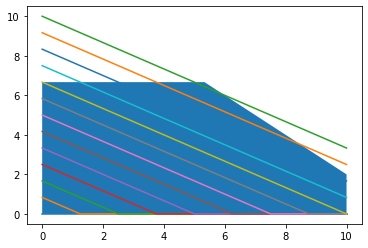

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Objective 12-h_1 = h_2
#the Just the places where the inequalities intersect
h_1= [0,0,16/3,10,10]
h_2 = [0,20/3,20/3,2,0]
fig, ax = plt.subplots()
ax.fill(h_1,h_2)
#objective function
possible_scores = [i*0.5 for i in range(13)]
for score in possible_scores:
    h_1 = np.linspace(0,10,1000)
    h_2 = np.array([(score - 0.4*num)/0.6 if score - 0.4*num > 0 else 0 for num in h_1])
    plt.plot(h_1,h_2)
plt.show()



As you can see the area defined by our constraints creates this polygon on the Cartesian Plane. Our objective function can be graphed as  a series of parallel lines projected onto the xy plane. we can assign different composite scores and project them. As you can bigger is better and the higher scores will be up and to the right. This lets us know that our solution is probably in the point where the projection of our function onto the xy plane touches our simplex in exactly one place. This is doable with two variables, but it quickly becomes unmanageable in 3 or 4 dimensions.

# Simplex Method
During his first year pursuing his PhD in statistics at Berkeley, George Dantzig attended a class incredibly late. On the whiteboard there were two problems that had been assigned for homework. Days later, he apologized to his professor for attending class late and for turning in the homework late. He stated that these problems were a bit harder than usual. His professor was in a hurry and told him to toss the homework on his desk.

Unknown to him at the time was that these were just examples of "unsolvable problems". Six weeks later, his professor told him that he would be sending out the homework for publication. This paper was not published until after World War II; however, the techniques described were used by the governent to plan rations and aid with the war.

The name simplex comes from the term used for a shape whose faces are all triangles in n-dimensions. In 0 dimensions it's a point, in 1 dimension it's a line, 2-dimensions it's a triangle, in 3 dimensions it is a tetrahedron.

The basic outline of the method is as follows:
- Write out the objective function and constraints as you normally would
- Make sure that you are maximizing the objective function. If you are minimizing, multiply it by -1 and change the min to max
- For each constraint introduce a slack variable that changes the inequality into an equality

$h_1 + h_2 \leq 12 \rightarrow h_1+h_2+s_1 = 12$

$0.4 h_1 \rightarrow 0.4 h_1 + s_2 = 4$
$0.6 h_2 \rightarrow 0.6 h_2 + s_3 = 4$

- Find out where the lines of your inequality intersect, since we know the solution must be in a corner. There will always be 3 nonzero variables in each point.
Point $(h_1, h_2, s_1, s_2, s_3)$
Point 1: $(0,0,12,4,4)$
Point 2: $(0,8,4,0,4)$
Point 3: $(4,8,0,0,3.4)$
Point 4: $(10,2,0,0,3)$
Point 5: $(10,2,2,0,4)$

- The corners of the simplex that you form will be the candidates for your maximum.
- We Pivot or check our objective function at each corner. The highest value wins and we are done.

In [ ]:
#Point (h_1, h_2, s_1, s_2, s_3)
point_1 = (0,0,12,4,4)
point_2 = (0,8,4,0,4)
point_3 = (4,8,0,0,3.4)
point_4 = (10,2,0,0,3)
point_5 = (10,2,2,0,4)
corners = [point_1,point_2,point_3,point_4,point_5]
grades = [0.4*h_1 + 0.6*h_2 for h_1,h_2,s_1,s_2,s_3 in corners]
for i,grade in enumerate(grades):
    print(f"Point: {corners[i]} \t\t Grade: {grade}")

Point: (0, 0, 12, 4, 4) 		 Grade: 0.0
Point: (0, 8, 4, 0, 4) 		 Grade: 4.8
Point: (4, 8, 0, 0, 3.4) 		 Grade: 6.4
Point: (10, 2, 0, 0, 3) 		 Grade: 5.2
Point: (10, 2, 2, 0, 4) 		 Grade: 5.2


The highest score possible was 5.2 given by the coordinates (10,2). We can ignore the slack variable as they aid in the algorithm but do not contribute to the objective function. You may be wondering what the point of the slack variables was. This is because when doing the Simplex in more dimensions we use vectors and matrices instead of variables and equations. This lets us do some trickier computations by hand more efficiently; however, we have evolved and now have numerical tools to help us with these problems.